# SVD

In [4]:
import numpy as np

A = np.array([[1, 0, 0, 0, 2],
              [0, 0, 3, 0, 0],
              [0, 0, 0, 0, 0],
              [0, 2, 0, 0, 0]
              ])

In [5]:
U, S, VT = np.linalg.svd(A)

print(f'U:\n{U}')
print(f'S:\n{S}')
print(f'VT:\n{VT}')

U:
[[ 0.  1.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0. -1.]
 [ 0.  0.  1.  0.]]
S:
[3.         2.23606798 2.         0.        ]
VT:
[[-0.          0.          1.         -0.          0.        ]
 [ 0.4472136   0.          0.          0.          0.89442719]
 [-0.          1.          0.         -0.          0.        ]
 [ 0.          0.          0.          1.          0.        ]
 [-0.89442719  0.          0.          0.          0.4472136 ]]


In [6]:
import os
from PIL import Image
import matplotlib.pyplot as plt

path="im.jpg"

img = Image.open(path)

##### os.path.getsize() 파일크기를 바이트단위로 반환 
- float(os.path.getsize(path)) / 1000 = 55.837

(567, 431)
RGB


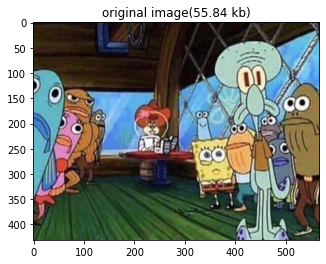

In [7]:
s = float(os.path.getsize(path))/1000 #Q. 항상 1000을 나눠줘야 하는 건가?
print(img.size)
print(img.mode)
plt.title("original image({:.2f} kb)".format(s))
plt.imshow(img)

In [14]:
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)), float)

In [29]:
imgmat.shape

(244377,)

In [30]:
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
imgmat.shape

(431, 567)

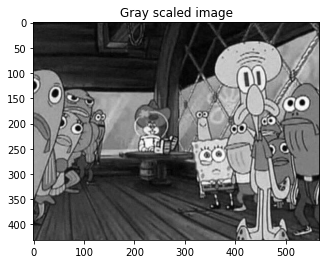

In [31]:
plt.figure()
plt.imshow(imgmat, cmap='gray')
plt.title("Gray scaled image")
plt.show()

In [36]:
U, S, Vt = np.linalg.svd(imgmat)


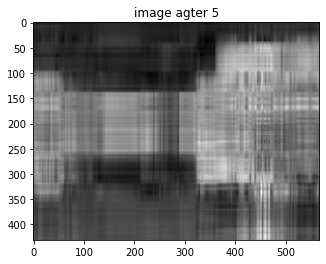

<PIL.Image.Image image mode=L size=567x431 at 0x22FFF2C8808>


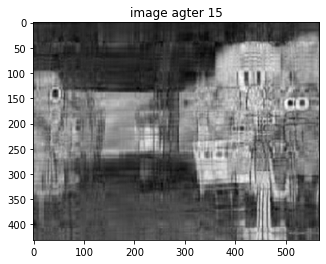

<PIL.Image.Image image mode=L size=567x431 at 0x22FFE704488>


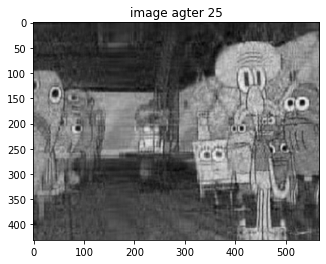

<PIL.Image.Image image mode=L size=567x431 at 0x22FFF4FDAC8>


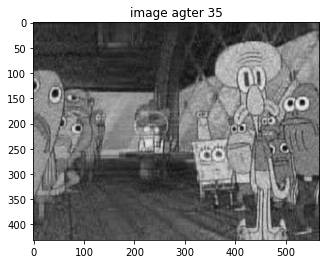

<PIL.Image.Image image mode=L size=567x431 at 0x22FFE4EFC48>


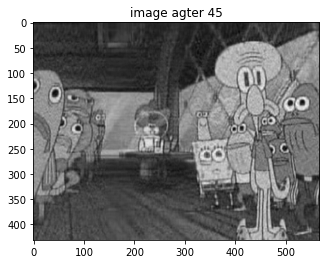

<PIL.Image.Image image mode=L size=567x431 at 0x22FFF9DFE48>


In [41]:
for i in range(5, 51, 10):
    cmpimg = np.matrix(U[:, :i] * np.diag(S[:i]) * np.matrix(Vt[:i, :]))
    plt.imshow(cmpimg, cmap='gray')
    title = "image agter {}".format(i)
    plt.title(title)
    plt.show()
    result = Image.fromarray((cmpimg).astype(np.uint8))
    print(result)

In [42]:
plt.rc('font', family='Malgun Gothic')

In [44]:
doc_ls = ['바나나 사과 포도 포도 짜장면',
         '사과 포도',
         '포도 바나나',
         '짜장면 짬뽕 탕수육',
         '볶음밥 탕수육',
         '짜장면 짬뽕',
         '라면 스시',
         '스시 짜장면',
         '가츠동 스시 소바',
         '된장찌개 김치찌개 김치',
         '김치 된장 짜장면',
         '비빔밥 김치'
         ]

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

n_topic = 3

tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(doc_ls)
svd = TruncatedSVD(n_components=n_topic, n_iter=100)

U = svd.fit_transform(tfidf)
Vt = svd.components_

In [48]:
len(doc_ls)

12

In [50]:
U.shape

(12, 3)

In [51]:
Vt.shape

(3, 16)

In [60]:
vocab = tfidf_vect.get_feature_names()
print(vocab)
n = 3
for i, topic in enumerate(Vt):
    print("Topic {}".format(i), [ (vocab[i], topic[i], round(3)) for i in topic.argsort()[:-n-1:-1]])

['가츠동', '김치', '김치찌개', '된장', '된장찌개', '라면', '바나나', '볶음밥', '비빔밥', '사과', '소바', '스시', '짜장면', '짬뽕', '탕수육', '포도']
Topic 0 [('포도', 0.5825052697793935, 3), ('짜장면', 0.4991573043017825, 3), ('바나나', 0.32971129941106686, 3)]
Topic 1 [('짜장면', 0.4399240681700941, 3), ('짬뽕', 0.3914264433052307, 3), ('스시', 0.31494724570032173, 3)]
Topic 2 [('스시', 0.7027805168888092, 3), ('라면', 0.352797019802214, 3), ('가츠동', 0.2532665288750629, 3)]


In [61]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def calc_simiarlty_matrix(vectors):
    def consine_similarity(a,b):
        return dot(a,b)/(norm(a)*norm(b))
    
    n_word = len(vectors)
    similarity_matrix = np.zeros((n_word, n_word))
    
    for i in range(n_word):
        for j in range(n_word):
            similarity_matrix[j, i] = consine_similarity(vectors[i], vectors[j]).round(4)

    return similarity_matrix

In [62]:
word_vectors = Vt.T
word_similarity_matrix = calc_simiarlty_matrix(word_vectors)

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_similarity(similarity_matrix, label):
    mask = np.triu(np.ones_like(similarity_matrix, dtype=np.bool))
    plt.rcParams['figure.figsize'] = [8, 6]
    plt.rc('font', family='Malgun Gothic')
    ax = sns.heatmap(similarity_matrix, mask=mask, xticklabels=label, yticklabels=label,
                     annot=True, fmt=".2f", annot_kws={"size":8},cmap="coolwarm")

C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


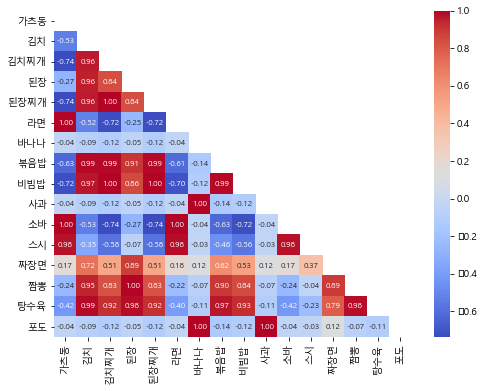

In [66]:
visualize_similarity(word_similarity_matrix, vocab)

In [67]:
U.shape

(12, 3)

C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


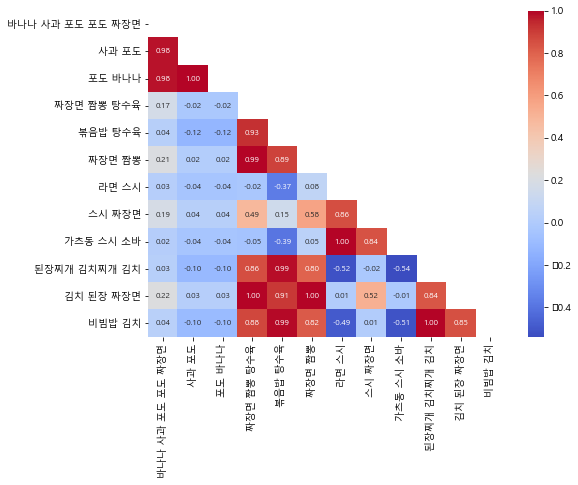

In [70]:
doc_similarity_matrix = calc_simiarlty_matrix(U)
visualize_similarity(doc_similarity_matrix, doc_ls)

In [71]:
from sklearn.manifold import TSNE

def visualize_vectors(vectors, labels):
    tsne = TSNE(n_components=2, n_iter=10000, perplexity=2)
    np.set_printoptions(suppress=True)
    T = tsne.fit_transform(vectors)

    plt.figure(figsize=(10, 6))
    plt.scatter(T[:,0], T[:, 1], c='orange', edgecolors='r')
    for label, x, y in zip(labels, T[:,0], T[:, 1]):
        plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


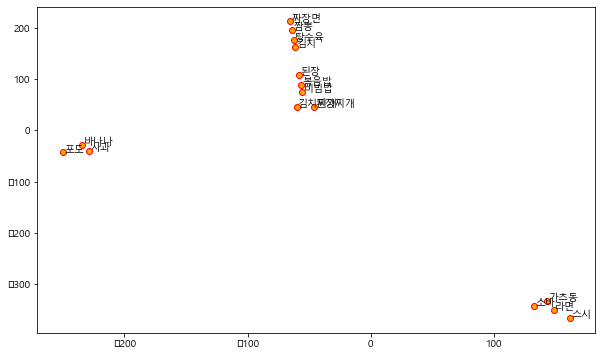

In [72]:
visualize_vectors(word_vectors, vocab)